In [4]:
import pandas as pd

data = pd.read_csv('Official_final_dataset.csv')

In [5]:
from sklearn.model_selection import train_test_split

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print('Training set dimension: ' + str(X_train.shape))
print('Test set dimension: ' + str(X_test.shape))

Training set dimension: (1109, 50)
Test set dimension: (547, 50)


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
 
# Train the classifier
rf_classifier.fit(X_train, y_train)
 
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)
 
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
 
# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.94

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       283
           1       0.96      0.91      0.94       264

    accuracy                           0.94       547
   macro avg       0.94      0.94      0.94       547
weighted avg       0.94      0.94      0.94       547



Feature: Old_people_perc Score: 0.35383382279582154
Feature: Periodic_herb Score: 0.2368000693586083
Feature: Non_class_surf Score: 0.23543770241249273
Feature: LU0201 Score: 0.2331836854533753
Feature: Hardwood Score: 0.21581106971216446
Feature: Trees_cover Score: 0.2120901871647316
Feature: Coniferous Score: 0.21053493225699693
Feature: LU0101 Score: 0.20715992612489664
Feature: Shrubs Score: 0.20523976501293628
Feature: Imper_surf Score: 0.19144286666313093
Feature: Permanent_water Score: 0.18817319923152898
Feature: LU0105 Score: 0.1880895989208895
Feature: LU0102 Score: 0.18551945238716794
Feature: LU0301 Score: 0.17152163792958142
Feature: LU0103 Score: 0.16524836158299916
Feature: LU0302 Score: 0.15625876572617514
Feature: LU0305 Score: 0.14232444493258178
Feature: LU0104 Score: 0.13800015883782635
Feature: Perm_surf Score: 0.13734857095492892
Feature: Permanent_herb Score: 0.13150410937475066
Feature: Grass_cover Score: 0.12703918253704227
Feature: Small_woods_cover Score: 0.0

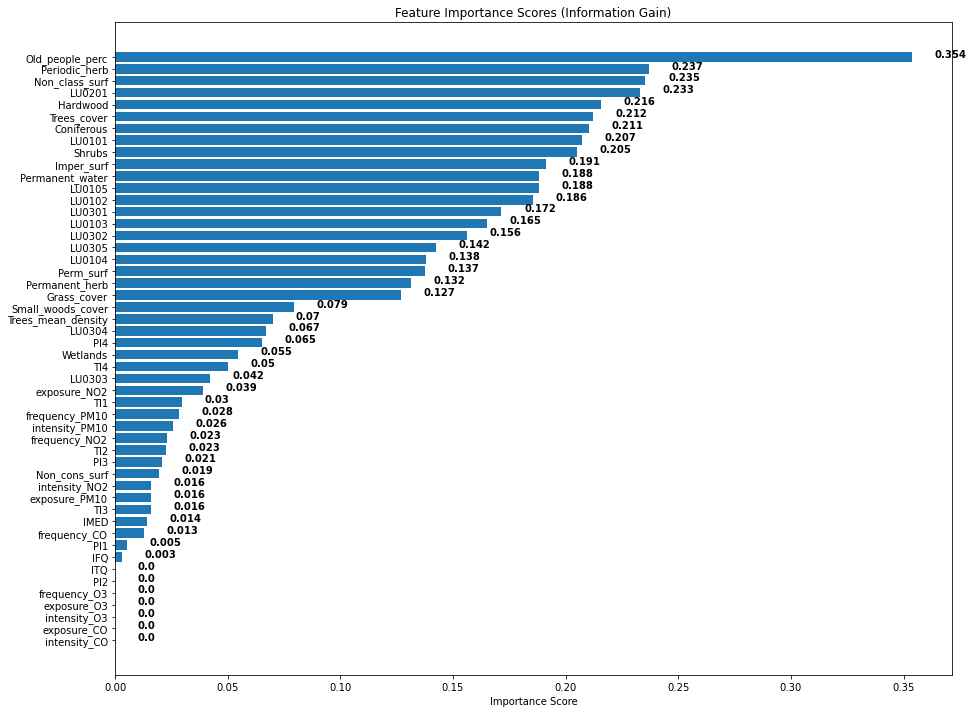

In [8]:
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
import numpy as np

# Apply Information Gain
ig = mutual_info_regression(X_train, y_train)

# Create a dictionary of feature importance scores
feature_scores = {}
for i in range(len(X_train.columns)):
    feature_scores[X_train.columns[i]] = ig[i]
# Sort the features by importance score in descending order
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

# Print the feature importance scores and the sorted features
for feature, score in sorted_features:
    print("Feature:", feature, "Score:", score)
# Plot a horizontal bar chart of the feature importance scores
fig, ax = plt.subplots(figsize=(15,12))
y_pos = np.arange(len(sorted_features))
ax.barh(y_pos, [score for feature, score in sorted_features], align="center")
ax.set_yticks(y_pos)
ax.set_yticklabels([feature for feature, score in sorted_features])
ax.invert_yaxis()  # Labels read top-to-bottom
ax.set_xlabel("Importance Score")
ax.set_title("Feature Importance Scores (Information Gain)")

# Add importance scores as labels on the horizontal bar chart
for i, v in enumerate([score for feature, score in sorted_features]):
    ax.text(v + 0.01, i, str(round(v, 3)), color="black", fontweight="bold")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
 
# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

In [ ]:
import seaborn as sns
coeff=pd.DataFrame()
coeff["feature"]=X_train.columns
coeff["w"]= clf.coef_[0]
coeff.sort_values(by=['w'], inplace=True)

fig, ax = plt.subplots(figsize=(13, 13))
sns.barplot(data=coeff, y="feature", x="w", palette="Blues_d", orient="h")
plt.show()